<a href="https://colab.research.google.com/github/20hnu/time_series/blob/main/smoothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

from sklearn.metrics import mean_absolute_error

In [3]:
airline = pd.read_csv("/content/drive/MyDrive/Campus_X_share/Smoothing_code/airline-passengers_data.csv",index_col='Month',parse_dates=True)

In [4]:
airline

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


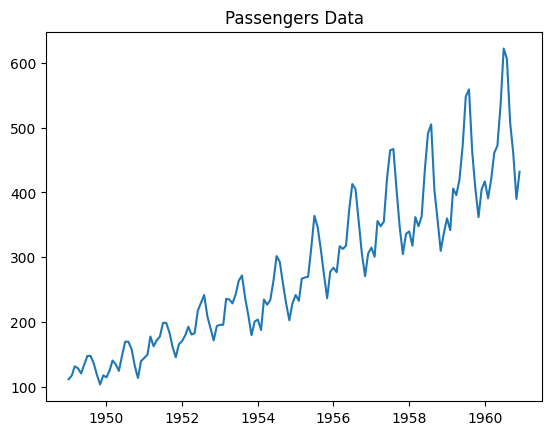

In [6]:
plt.plot(airline)
plt.title("Passengers Data")
plt.show()

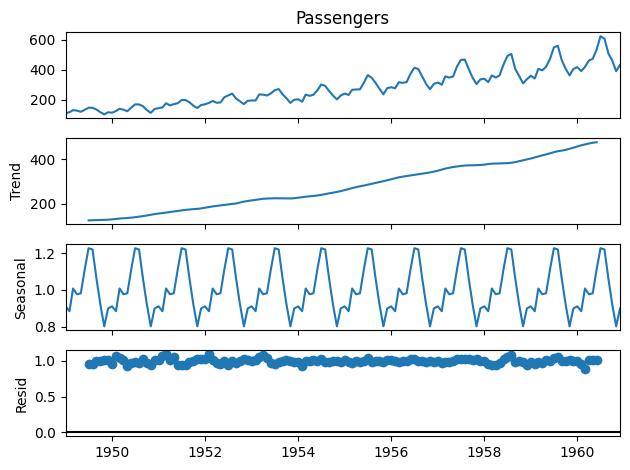

In [8]:
decompose_result = seasonal_decompose(airline["Passengers"],model="multiplicative")
decompose_result.plot()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  sel

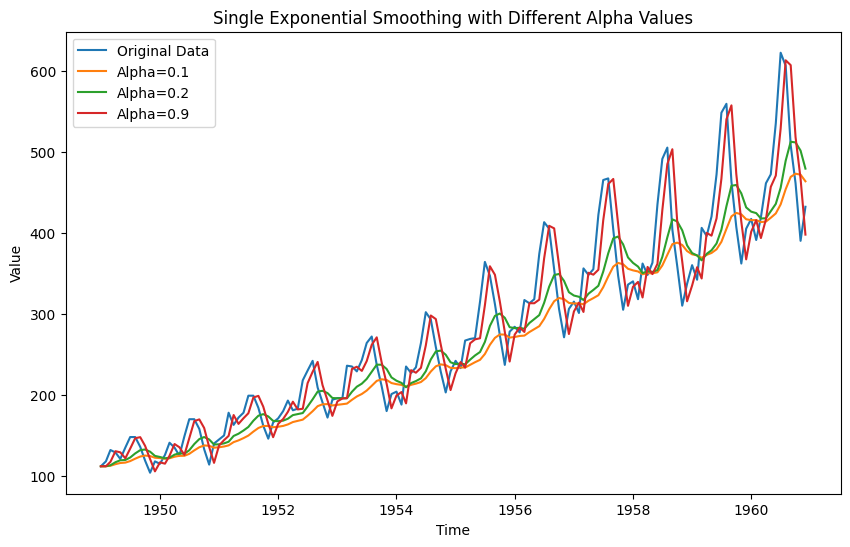

In [9]:
alphas= [0.1,0.2,0.9]

plt.figure(figsize=(10,6))
plt.plot(airline, label="Original Data")


for alpha in alphas:
  model =SimpleExpSmoothing(airline["Passengers"]).fit(smoothing_level=alpha)
  smoothed_data = model.fittedvalues
  plt.plot(smoothed_data, label=f"Alpha={alpha}")


plt.title('Single Exponential Smoothing with Different Alpha Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


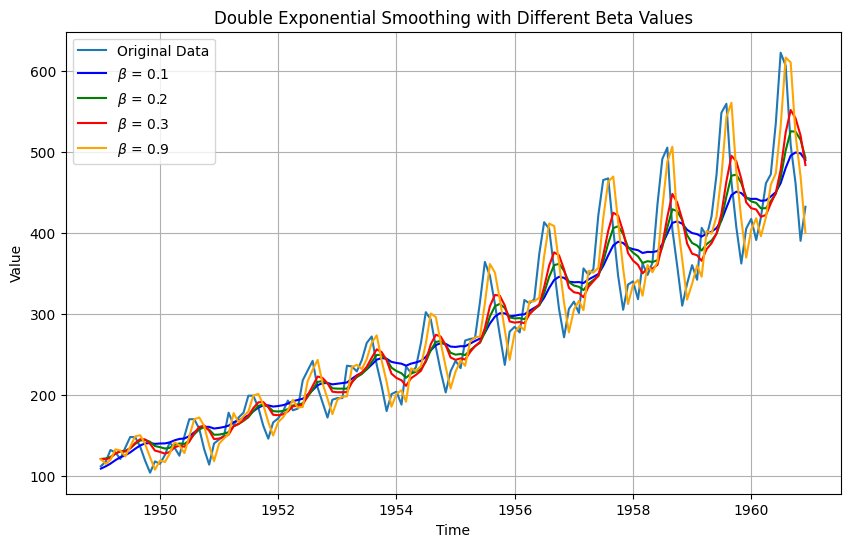

In [10]:
# Define beta values
betas = [0.1, 0.2, 0.3, 0.9]

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(airline, label='Original Data')

# Define colors for each beta value
colors = ['blue', 'green', 'red', 'orange']

# Plot smoothed curves for different betas with different colors
for beta, color in zip(betas, colors):
    model = ExponentialSmoothing(airline, trend='add').fit(smoothing_level=beta)
    smoothed_data = model.fittedvalues
    plt.plot(smoothed_data, label=r'$\beta$ = {}'.format(beta), color=color)

plt.title('Double Exponential Smoothing with Different Beta Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


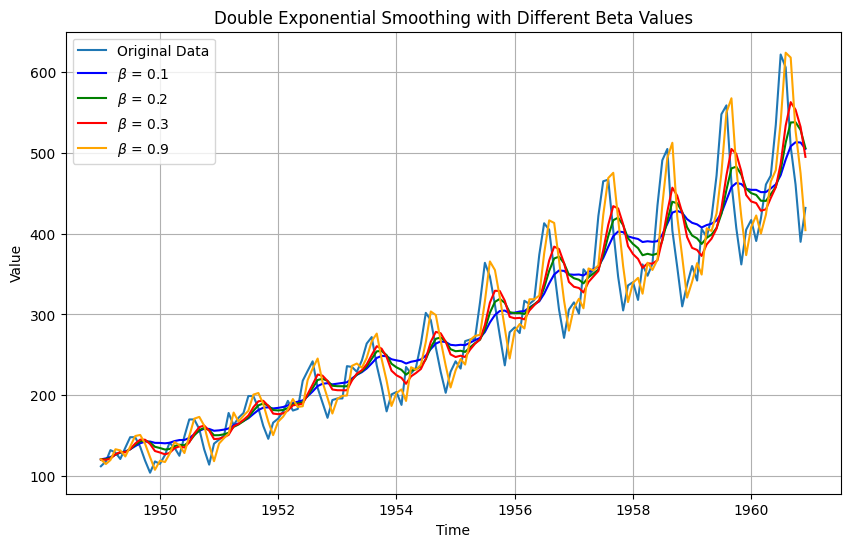

In [11]:
# Define beta values
betas = [0.1, 0.2, 0.3, 0.9]

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(airline, label='Original Data')

# Define colors for each beta value
colors = ['blue', 'green', 'red', 'orange']

# Plot smoothed curves for different betas with different colors
for beta, color in zip(betas, colors):
    model = ExponentialSmoothing(airline, trend='mul').fit(smoothing_level=beta)
    smoothed_data = model.fittedvalues
    plt.plot(smoothed_data, label=r'$\beta$ = {}'.format(beta), color=color)

plt.title('Double Exponential Smoothing with Different Beta Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
airline.index.freq = 'MS'
train=airline[:132]
test=airline[132:]


In [13]:
import itertools

In [14]:
alphas=betas=gammas = np.arange(0.10,1,0.2)
abg= list(itertools.product(alphas,betas,gammas))

In [16]:
def tes_optimizer(train, test, abg, trend_mode='add', seasonal_mode = 'mul', seasonal_period=12,step=len(test)):

  best_alpha, best_beta, best_gamma, best_mae = None, None, None, float("inf")
  for comb in abg:
          tes_model = ExponentialSmoothing(train, trend=trend_mode, seasonal=seasonal_mode, seasonal_periods=seasonal_period).\
              fit(smoothing_level=comb[0], smoothing_trend=comb[1], smoothing_seasonal=comb[2])
          y_pred = tes_model.forecast(step)
          mae = mean_absolute_error(test, y_pred)
          if mae < best_mae:
              best_alpha, best_beta, best_gamma, best_mae = comb[0], comb[1], comb[2], mae
          print([round(comb[0], 2), round(comb[1], 2), round(comb[2], 2), round(mae, 2)])
  print("best_alpha:", round(best_alpha, 2), "best_beta:", round(best_beta, 2), "best_gamma:", round(best_gamma, 2),
            "best_mae:", round(best_mae, 4))
  return best_alpha, best_beta, best_gamma, best_mae

In [17]:
best_alpha, best_beta, best_gamma, best_mae = tes_optimizer(train, test, abg)

[0.1, 0.1, 0.1, 19.35]
[0.1, 0.1, 0.3, 14.68]
[0.1, 0.1, 0.5, 12.26]
[0.1, 0.1, 0.7, 12.23]
[0.1, 0.1, 0.9, 11.52]
[0.1, 0.3, 0.1, 17.97]
[0.1, 0.3, 0.3, 20.37]
[0.1, 0.3, 0.5, 21.78]
[0.1, 0.3, 0.7, 22.36]
[0.1, 0.3, 0.9, 23.69]
[0.1, 0.5, 0.1, 40.54]
[0.1, 0.5, 0.3, 36.72]
[0.1, 0.5, 0.5, 29.59]
[0.1, 0.5, 0.7, 21.14]
[0.1, 0.5, 0.9, 16.78]
[0.1, 0.7, 0.1, 41.82]
[0.1, 0.7, 0.3, 28.05]
[0.1, 0.7, 0.5, 11.29]
[0.1, 0.7, 0.7, 35.84]
[0.1, 0.7, 0.9, 17.91]
[0.1, 0.9, 0.1, 32.68]
[0.1, 0.9, 0.3, 10.74]
[0.1, 0.9, 0.5, 27.94]
[0.1, 0.9, 0.7, 17.95]
[0.1, 0.9, 0.9, 15.82]
[0.3, 0.1, 0.1, 12.54]
[0.3, 0.1, 0.3, 16.39]
[0.3, 0.1, 0.5, 16.77]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.3, 0.1, 0.7, 15.78]
[0.3, 0.1, 0.9, 18.22]
[0.3, 0.3, 0.1, 30.05]
[0.3, 0.3, 0.3, 41.18]
[0.3, 0.3, 0.5, 32.78]
[0.3, 0.3, 0.7, 32.62]
[0.3, 0.3, 0.9, 37.18]
[0.3, 0.5, 0.1, 33.32]
[0.3, 0.5, 0.3, 50.62]
[0.3, 0.5, 0.5, 46.25]
[0.3, 0.5, 0.7, 47.49]
[0.3, 0.5, 0.9, 51.25]
[0.3, 0.7, 0.1, 19.98]
[0.3, 0.7, 0.3, 38.75]
[0.3, 0.7, 0.5, 51.21]
[0.3, 0.7, 0.7, 54.88]
[0.3, 0.7, 0.9, 1304.98]
[0.3, 0.9, 0.1, 9.83]
[0.3, 0.9, 0.3, 26.73]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.3, 0.9, 0.5, 50.72]
[0.3, 0.9, 0.7, 3626.28]
[0.3, 0.9, 0.9, 5918.68]
[0.5, 0.1, 0.1, 12.98]
[0.5, 0.1, 0.3, 19.77]
[0.5, 0.1, 0.5, 28.05]
[0.5, 0.1, 0.7, 28.34]
[0.5, 0.1, 0.9, 24.98]
[0.5, 0.3, 0.1, 18.61]
[0.5, 0.3, 0.3, 28.26]
[0.5, 0.3, 0.5, 42.45]
[0.5, 0.3, 0.7, 47.92]
[0.5, 0.3, 0.9, 35.72]
[0.5, 0.5, 0.1, 11.3]
[0.5, 0.5, 0.3, 12.61]
[0.5, 0.5, 0.5, 39.52]
[0.5, 0.5, 0.7, 51.28]
[0.5, 0.5, 0.9, 41.49]
[0.5, 0.7, 0.1, 10.67]
[0.5, 0.7, 0.3, 21.9]
[0.5, 0.7, 0.5, 39.26]
[0.5, 0.7, 0.7, 48.52]
[0.5, 0.7, 0.9, 69.61]
[0.5, 0.9, 0.1, 16.15]
[0.5, 0.9, 0.3, 41.23]
[0.5, 0.9, 0.5, 32.7]
[0.5, 0.9, 0.7, 52.05]
[0.5, 0.9, 0.9, 99.62]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.7, 0.1, 0.1, 11.94]
[0.7, 0.1, 0.3, 14.17]
[0.7, 0.1, 0.5, 23.93]
[0.7, 0.1, 0.7, 35.17]
[0.7, 0.1, 0.9, 38.68]
[0.7, 0.3, 0.1, 13.72]
[0.7, 0.3, 0.3, 12.6]
[0.7, 0.3, 0.5, 26.06]
[0.7, 0.3, 0.7, 49.93]
[0.7, 0.3, 0.9, 61.0]
[0.7, 0.5, 0.1, 10.56]
[0.7, 0.5, 0.3, 11.54]
[0.7, 0.5, 0.5, 22.39]
[0.7, 0.5, 0.7, 42.48]
[0.7, 0.5, 0.9, 71.21]
[0.7, 0.7, 0.1, 10.62]
[0.7, 0.7, 0.3, 11.25]
[0.7, 0.7, 0.5, 32.55]
[0.7, 0.7, 0.7, 39.39]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.7, 0.7, 0.9, 1163.97]
[0.7, 0.9, 0.1, 10.68]
[0.7, 0.9, 0.3, 22.76]
[0.7, 0.9, 0.5, 47.71]
[0.7, 0.9, 0.7, 3610.65]
[0.7, 0.9, 0.9, 3106.64]
[0.9, 0.1, 0.1, 11.2]
[0.9, 0.1, 0.3, 12.73]
[0.9, 0.1, 0.5, 20.02]
[0.9, 0.1, 0.7, 30.52]
[0.9, 0.1, 0.9, 33.91]
[0.9, 0.3, 0.1, 12.44]
[0.9, 0.3, 0.3, 15.79]
[0.9, 0.3, 0.5, 26.8]
[0.9, 0.3, 0.7, 38.6]
[0.9, 0.3, 0.9, 40.1]
[0.9, 0.5, 0.1, 10.34]
[0.9, 0.5, 0.3, 19.63]
[0.9, 0.5, 0.5, 32.42]
[0.9, 0.5, 0.7, 32.91]
[0.9, 0.5, 0.9, 442.75]
[0.9, 0.7, 0.1, 10.06]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


[0.9, 0.7, 0.3, 28.73]
[0.9, 0.7, 0.5, 14.71]
[0.9, 0.7, 0.7, 17.14]
[0.9, 0.7, 0.9, 542.35]
[0.9, 0.9, 0.1, 13.34]
[0.9, 0.9, 0.3, 27.76]
[0.9, 0.9, 0.5, 38.45]
[0.9, 0.9, 0.7, 3813.73]
[0.9, 0.9, 0.9, 610.9]
best_alpha: 0.3 best_beta: 0.9 best_gamma: 0.1 best_mae: 9.8345


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [18]:
best_alpha, best_beta, best_gamma

(0.30000000000000004, 0.9000000000000001, 0.1)

In [19]:
final_tes_model= ExponentialSmoothing(airline, trend='add', seasonal='mul', seasonal_periods=12).\
              fit(smoothing_level=best_alpha, smoothing_trend=best_beta, smoothing_seasonal=best_gamma)

In [20]:
y_forecast=final_tes_model.forecast(20)

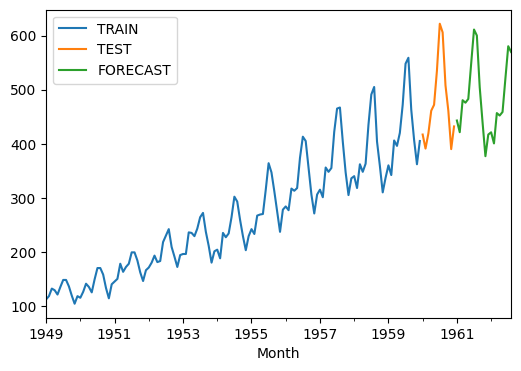

In [21]:
train['Passengers'].plot(legend=True,label='TRAIN')
test['Passengers'].plot(legend=True,label='TEST',figsize=(6,4))
y_forecast.plot(legend=True,label='FORECAST')
plt.show()

Rolling Code snippet

In [26]:
rolling_mean= airline["Passengers"].rolling(window=3).mean().dropna()

In [27]:
rolling_mean

,Passengers
Month,
1949-03-01,120.666667
1949-04-01,126.333333
1949-05-01,127.333333
1949-06-01,128.333333
1949-07-01,134.666667
...,...
1960-08-01,587.666667
1960-09-01,578.666667
1960-10-01,525.000000


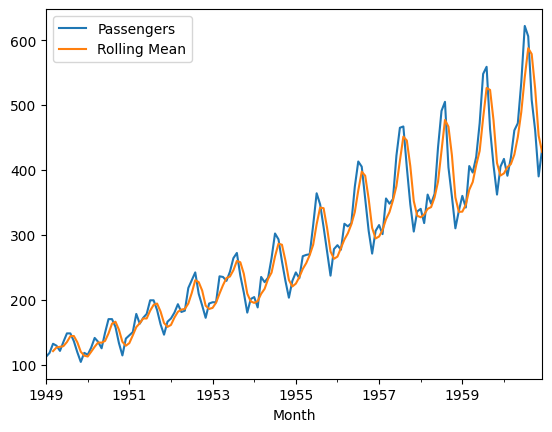

In [28]:
airline.plot(legend=True,label='Original Data')
rolling_mean.plot(legend=True,label='Rolling Mean')
plt.show()